# Classification and Regression

## Binary Classification

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# y = Wx + b

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

In [6]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [7]:
word_index = tf.keras.datasets.imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])
decoded_review

"? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls br br black mag

In [8]:
train_data[10]

[1,
 785,
 189,
 438,
 47,
 110,
 142,
 7,
 6,
 7475,
 120,
 4,
 236,
 378,
 7,
 153,
 19,
 87,
 108,
 141,
 17,
 1004,
 5,
 2,
 883,
 2,
 23,
 8,
 4,
 136,
 2,
 2,
 4,
 7475,
 43,
 1076,
 21,
 1407,
 419,
 5,
 5202,
 120,
 91,
 682,
 189,
 2818,
 5,
 9,
 1348,
 31,
 7,
 4,
 118,
 785,
 189,
 108,
 126,
 93,
 2,
 16,
 540,
 324,
 23,
 6,
 364,
 352,
 21,
 14,
 9,
 93,
 56,
 18,
 11,
 230,
 53,
 771,
 74,
 31,
 34,
 4,
 2834,
 7,
 4,
 22,
 5,
 14,
 11,
 471,
 9,
 2,
 34,
 4,
 321,
 487,
 5,
 116,
 15,
 6584,
 4,
 22,
 9,
 6,
 2286,
 4,
 114,
 2679,
 23,
 107,
 293,
 1008,
 1172,
 5,
 328,
 1236,
 4,
 1375,
 109,
 9,
 6,
 132,
 773,
 2,
 1412,
 8,
 1172,
 18,
 7865,
 29,
 9,
 276,
 11,
 6,
 2768,
 19,
 289,
 409,
 4,
 5341,
 2140,
 2,
 648,
 1430,
 2,
 8914,
 5,
 27,
 3000,
 1432,
 7130,
 103,
 6,
 346,
 137,
 11,
 4,
 2768,
 295,
 36,
 7740,
 725,
 6,
 3208,
 273,
 11,
 4,
 1513,
 15,
 1367,
 35,
 154,
 2,
 103,
 2,
 173,
 7,
 12,
 36,
 515,
 3547,
 94,
 2547,
 1722,
 5,
 3547,
 36,
 20

In [9]:
# Let's vectorize the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

In [10]:
x_train =vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train.shape

(25000, 10000)

In [12]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [28]:
# Building the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1000, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1000)              10001000  
                                                                 
 dense_8 (Dense)             (None, 100)               100100    
                                                                 
 dense_9 (Dense)             (None, 16)                1616      
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 10,102,733
Trainable params: 10,102,733
Non-trainable params: 0
_________________________________________________________________


In [30]:
x_val = x_train[:5000]
y_val = y_train[:5000]

partial_x_train = x_train[5000:]
partial_y_train = y_train[5000:]

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
]

history = model.fit(partial_x_train, partial_y_train,
                    epochs=10,
                    callbacks=callbacks,
                    batch_size=512,
                    validation_data=(x_val, y_val))



Epoch 1/10
40/40 [==============================] - 5s 115ms/step - loss: 0.5603 - accuracy: 0.7048 - val_loss: 0.3513 - val_accuracy: 0.8612
Epoch 2/10
40/40 [==============================] - 4s 110ms/step - loss: 0.3201 - accuracy: 0.8670 - val_loss: 0.2919 - val_accuracy: 0.8792
Epoch 3/10
40/40 [==============================] - 4s 109ms/step - loss: 0.2421 - accuracy: 0.9014 - val_loss: 0.2718 - val_accuracy: 0.8874
Epoch 4/10
40/40 [==============================] - 4s 107ms/step - loss: 0.2159 - accuracy: 0.9161 - val_loss: 0.2702 - val_accuracy: 0.8920
Epoch 5/10
40/40 [==============================] - 4s 109ms/step - loss: 0.1680 - accuracy: 0.9353 - val_loss: 0.3010 - val_accuracy: 0.8884
Epoch 6/10
40/40 [==============================] - 4s 112ms/step - loss: 0.1299 - accuracy: 0.9541 - val_loss: 0.3743 - val_accuracy: 0.8644


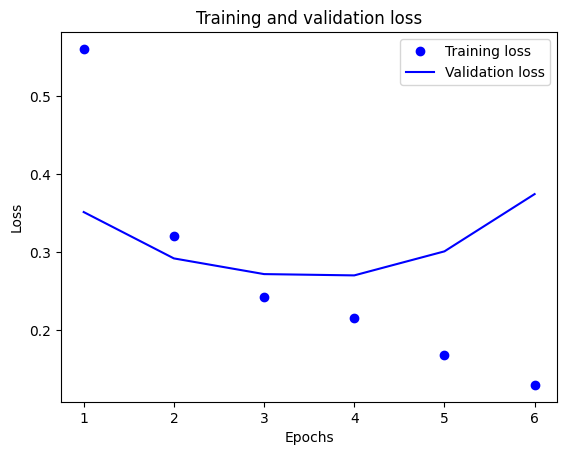

In [31]:
# Let's plot the training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

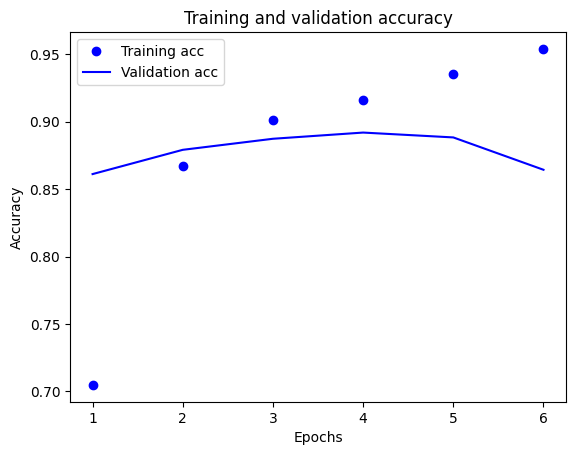

In [32]:
# Plot accuracy of the training and validation set
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
# validate on test data
results = model.evaluate(x_test, y_test)
results 

782/782 [==============================] - 8s 10ms/step - loss: 0.3964 - accuracy: 0.8578


[0.3963778614997864, 0.8578400015830994]

## Reuters - Multiclass Classification

In [40]:
# import retuters dataset

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.reuters.load_data(num_words=10000)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 

y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)



In [50]:
# building the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1000, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(46, activation='softmax'))

# compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1000)              10001000  
                                                                 
 dense_18 (Dense)            (None, 200)               200200    
                                                                 
 dense_19 (Dense)            (None, 46)                9246      
                                                                 
Total params: 10,210,446
Trainable params: 10,210,446
Non-trainable params: 0
_________________________________________________________________


In [51]:
# prepare training and validation sets
x_val = x_train[:1500]
y_val = y_train[:1500]

partial_x_train = x_train[1500:]
partial_y_train = y_train[1500:]

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
]

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    callbacks=callbacks,
                    validation_data=(x_val, y_val))


Epoch 1/20
15/15 [==============================] - 2s 117ms/step - loss: 1.9755 - accuracy: 0.5474 - val_loss: 1.4119 - val_accuracy: 0.6647
Epoch 2/20
15/15 [==============================] - 2s 117ms/step - loss: 1.0859 - accuracy: 0.7485 - val_loss: 1.0760 - val_accuracy: 0.7560
Epoch 3/20
15/15 [==============================] - 2s 113ms/step - loss: 0.7743 - accuracy: 0.8189 - val_loss: 0.9796 - val_accuracy: 0.7747
Epoch 4/20
15/15 [==============================] - 2s 118ms/step - loss: 0.5594 - accuracy: 0.8733 - val_loss: 0.8916 - val_accuracy: 0.7953
Epoch 5/20
15/15 [==============================] - 2s 108ms/step - loss: 0.3973 - accuracy: 0.9067 - val_loss: 0.8724 - val_accuracy: 0.8053
Epoch 6/20
15/15 [==============================] - 2s 114ms/step - loss: 0.3507 - accuracy: 0.9179 - val_loss: 0.8518 - val_accuracy: 0.8120
Epoch 7/20
15/15 [==============================] - 2s 114ms/step - loss: 0.2226 - accuracy: 0.9451 - val_loss: 0.8612 - val_accuracy: 0.8180
Epoch 

In [52]:
# evaluate the model on test data
results = model.evaluate(x_test, y_test)
results

71/71 [==============================] - 1s 10ms/step - loss: 0.9828 - accuracy: 0.7921


[0.9827542901039124, 0.7920747995376587]

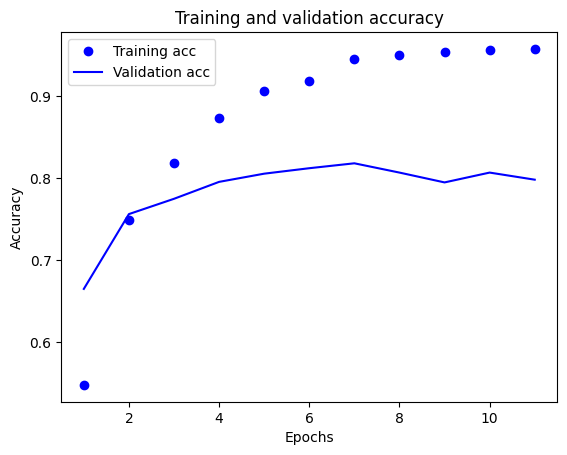

In [53]:
# plot accuracy of the training and validation set
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']      
plt.clf()
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

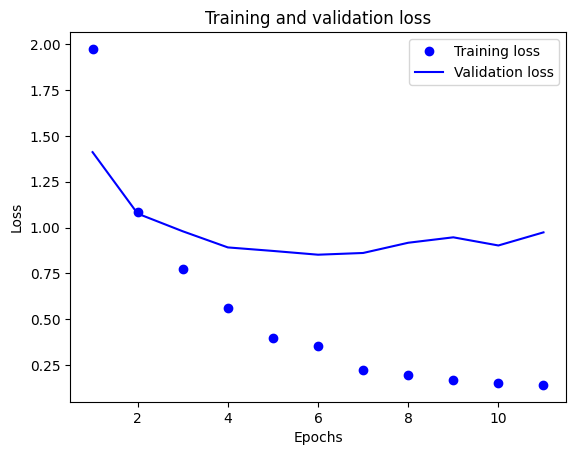

In [55]:
# plot loss of the training and validation set
plt.clf()
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()  

## Regression - House Price Predictions

In [56]:
# load house prices dataset

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [58]:
train_data.shape

(404, 13)

In [61]:
train_labels

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [62]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [65]:
# normalize the training data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

# normalize the test data
test_data -= mean
test_data /= std

In [64]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [66]:
# prepare validation set
x_val = train_data[:50]
y_val = train_labels[:50]
partial_x_train = train_data[50:]
partial_y_train = train_labels[50:]


In [90]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(train_data.shape[1],)))
#model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 32)                448       
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [91]:
# build the model
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])



In [92]:
# train the model

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
]
history = model.fit(partial_x_train, partial_y_train,
                    epochs=500,
                    batch_size=16,
                    callbacks=callbacks,
                    validation_data=(x_val, y_val))

Epoch 1/500
23/23 [==============================] - 0s 4ms/step - loss: 594.5278 - mae: 22.4665 - val_loss: 518.3080 - val_mae: 20.8715
Epoch 2/500
23/23 [==============================] - 0s 1ms/step - loss: 564.5026 - mae: 21.8879 - val_loss: 495.2218 - val_mae: 20.3847
Epoch 3/500
23/23 [==============================] - 0s 1ms/step - loss: 537.9581 - mae: 21.3482 - val_loss: 470.8488 - val_mae: 19.8648
Epoch 4/500
23/23 [==============================] - 0s 1ms/step - loss: 509.4237 - mae: 20.7603 - val_loss: 445.4363 - val_mae: 19.2943
Epoch 5/500
23/23 [==============================] - 0s 3ms/step - loss: 480.6926 - mae: 20.1399 - val_loss: 418.5399 - val_mae: 18.6709
Epoch 6/500
23/23 [==============================] - 0s 3ms/step - loss: 450.6484 - mae: 19.4773 - val_loss: 392.7674 - val_mae: 18.0449
Epoch 7/500
23/23 [==============================] - 0s 3ms/step - loss: 420.3703 - mae: 18.7598 - val_loss: 363.8732 - val_mae: 17.3132
Epoch 8/500
23/23 [======================

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


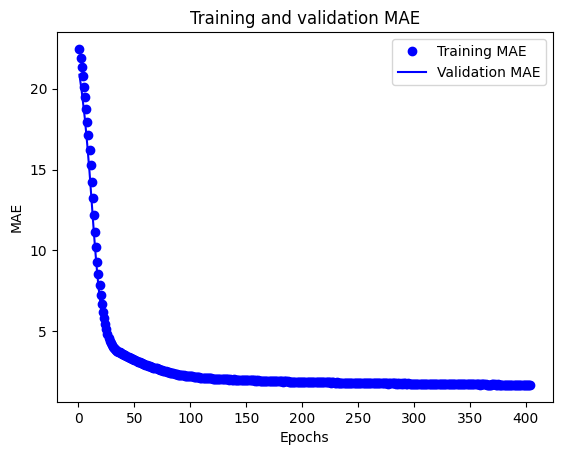

In [93]:
# plot accuracy of the training and validation set
history_dict = history.history
print(history_dict.keys())


acc = history_dict['mae']
val_acc = history_dict['val_mae']          
plt.clf()
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training MAE')
plt.plot(epochs, val_acc, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


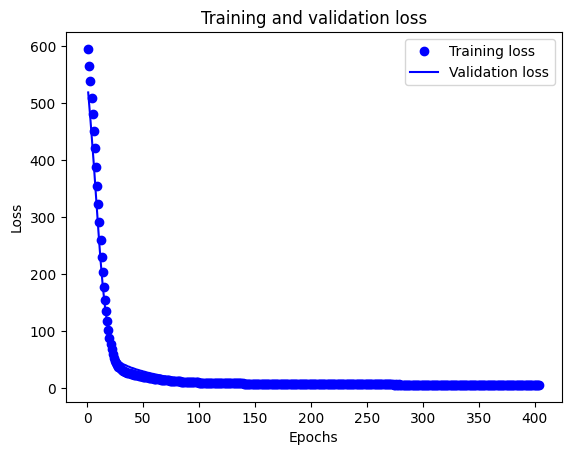

In [94]:
# plot loss of the training and validation set
plt.clf()
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [95]:
# validate the model on test data
results = model.evaluate(test_data, test_labels)
results 

4/4 [==============================] - 0s 2ms/step - loss: 2693455.0000 - mae: 1587.2135


[2693455.0, 1587.2135009765625]

In [96]:
# let's predict house prices
predictions = model.predict(test_data)
predictions[1]

4/4 [==============================] - 0s 960us/step


array([1629.8209], dtype=float32)

In [88]:
test_labels[1]

18.8